In [ ]:
"""
Project by Mobin Khatib
Email: mbnkhatib@gmail.com
GitHub: https://github.com/MobinKhatib
Date: April 2025
"""

In [3]:
!nvidia-smi

Wed Feb 12 05:31:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install ultralytics

In [5]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.9/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
RAM                 12.67 GB
Disk                33.9/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0

In [ ]:
#!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Rerun Training with Proper Settings
Use the following command to train again, ensuring weights are saved this time:

python
Copy code
model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=20, imgsz=640, save=True)
save=True ensures checkpoints (best.pt and last.pt) are saved automatically.
After training, verify the weights:
bash
Copy code
!ls runs/detect/train/weights
You should see files like best.pt and last.pt.

2. Resume Training for Additional Epochs
If training completes successfully and weights are saved, you can resume training for more epochs later:

python
Copy code
model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=40, imgsz=640, resume=True)
This will start from where the last training left off.

3. Save the Checkpoints Safely
After training, copy the weights to a safe location (e.g., Google Drive):

bash
Copy code
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/yolo_weights/
This ensures you won't lose the trained model if Colab disconnects.

from ultralytics import YOLO

# Load the best model
model = YOLO('/content/runs/train/train/weights/best.pt')  # Update the path

# Resume training
model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=10, imgsz=640, name='fine_tune')



In [7]:
len([f for f in os.listdir('/content/drive/MyDrive/yolo_labels') if f.endswith('.txt')])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/yolo_labels'

In [ ]:
import os
import shutil
import random

image_dir = "/content/drive/MyDrive/All Images Car"
label_dir = "/content/drive/MyDrive/yolo_labels"
dataset_dir = "/content/drive/MyDrive/dataset_Car_Plate"

images_output = os.path.join(dataset_dir, "images")
labels_output = os.path.join(dataset_dir, "labels")

for sub in ["train", "val", "test"]:
    os.makedirs(os.path.join(images_output, sub), exist_ok=True)
    os.makedirs(os.path.join(labels_output, sub), exist_ok=True)


In [ ]:
images = sorted(os.listdir(image_dir))
random.shuffle(images)

train_split = int(0.8 * len(images))
val_split = int(0.9 * len(images))

sets = {
    "train": images[:train_split],
    "val": images[train_split:val_split],
    "test": images[val_split:]
}

for set_type, files in sets.items():
    for img in files:
        img_path = os.path.join(image_dir, img)
        lbl_path = os.path.join(label_dir, img.replace(".jpg", ".txt"))

        if os.path.exists(lbl_path):
            shutil.copy(img_path, os.path.join(images_output, set_type, img))
            shutil.copy(lbl_path, os.path.join(labels_output, set_type, img.replace(".jpg", ".txt")))


In [7]:
import os

# Paths
label_dir = '/content/drive/MyDrive/dataset_Car_Plate/labels/train'
label_files = os.listdir(label_dir)

# Check for empty or missing labels
empty_labels = []
for file in label_files:
    file_path = os.path.join(label_dir, file)
    if os.path.getsize(file_path) == 0:  # Empty file
        empty_labels.append(file)

if not label_files:
    print("No label files found!")
elif empty_labels:
    print(f"Empty label files: {empty_labels}")
else:
    print("All label files are present and contain data.")


All label files are present and contain data.


In [8]:
import os

# Paths
#image_dir = "/content/drive/MyDrive/All Images Car"
#label_dir = "/content/drive/MyDrive/yolo_labels"
images_output = "/content/drive/MyDrive/dataset_Car_Plate/images"
labels_output = "/content/drive/MyDrive/dataset_Car_Plate/labels"

# Function to count the number of files
def count_files(directory, extension):
    return len([f for f in os.listdir(directory) if f.endswith(extension)])

# Counting files
counts = {
    "train": {
        "jpg": count_files(os.path.join(images_output, "train"), ".jpg"),
        "txt": count_files(os.path.join(labels_output, "train"), ".txt"),
    },
    "val": {
        "jpg": count_files(os.path.join(images_output, "val"), ".jpg"),
        "txt": count_files(os.path.join(labels_output, "val"), ".txt"),
    },
    "test": {
        "jpg": count_files(os.path.join(images_output, "test"), ".jpg"),
        "txt": count_files(os.path.join(labels_output, "test"), ".txt"),
    }
}

# Total counts
total_jpg = sum([counts[set_type]["jpg"] for set_type in counts])
total_txt = sum([counts[set_type]["txt"] for set_type in counts])

# Print results
print(f"Total .jpg files: {total_jpg}")
print(f"Total .txt files: {total_txt}")
for set_type in counts:
    print(f"{set_type.capitalize()} set: {counts[set_type]['jpg']} .jpg, {counts[set_type]['txt']} .txt")


Total .jpg files: 8280
Total .txt files: 8279
Train set: 6622 .jpg, 6621 .txt
Val set: 827 .jpg, 827 .txt
Test set: 831 .jpg, 831 .txt


In [ ]:
import os

def check_labels(image_dir, label_dir):
    images = {os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith('.jpg')}
    labels = {os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')}

    missing_labels = images - labels
    if missing_labels:
        print(f"Missing labels for images: {missing_labels}")
    else:
        print("All images have corresponding labels.")

# Paths to your dataset
base_path = '/content/drive/MyDrive/dataset_Car_Plate'
check_labels(f'{base_path}/images/train', f'{base_path}/labels/train')
check_labels(f'{base_path}/images/val', f'{base_path}/labels/val')
check_labels(f'{base_path}/images/test', f'{base_path}/labels/test')

Missing labels for images: {'img%20(4074)'}
All images have corresponding labels.
All images have corresponding labels.


In [ ]:
import os
os._exit(00)

In [1]:
!rm -rf /content/drive/MyDrive/training_results/


In [9]:
# Load the YOLO model
model = YOLO('yolov8m.pt')  # You can use 'yolov8s.pt' or 'yolov8n.pt' for smaller models
# Train the model
model.train(data='/content/drive/MyDrive/dataset_Car_Plate/data.yaml', epochs=5, imgsz=640, name='train', save=True, project='/content/drive/MyDrive/training_results')
#model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=20, imgsz=640, ####I should add this too )name='train')
# in below way it will save the results
# model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=40, imgsz=640, resume=True)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/dataset_Car_Plate/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/training_results, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/train... 6621 images, 0 backgrounds, 1 corrupt: 100%|██████████| 6622/6622 [59:43<00:00,  1.85it/s]

train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/images/train/img%20(4074).jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/images/train/img%20(4074).jpg'


train: New cache created: /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/val... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [07:16<00:00,  1.89it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/val.cache
Plotting labels to /content/drive/MyDrive/training_results/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/training_results/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      6.85G     0.7758     0.6433      1.011         61        640: 100%|██████████| 414/414 [03:54<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]

                   all        827       2933      0.926      0.948      0.974      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       6.9G     0.7724     0.4844      1.011         79        640: 100%|██████████| 414/414 [03:51<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]


                   all        827       2933      0.967       0.97      0.988      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      6.75G       0.74     0.4489     0.9964         79        640: 100%|██████████| 414/414 [03:46<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]

                   all        827       2933       0.98      0.974       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      6.87G     0.7018     0.4078     0.9784         92        640: 100%|██████████| 414/414 [03:45<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all        827       2933      0.982      0.976      0.992      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      6.88G     0.6537     0.3583     0.9539         75        640: 100%|██████████| 414/414 [03:46<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        827       2933      0.979      0.984      0.993      0.816



5 epochs completed in 0.340 hours.
Optimizer stripped from /content/drive/MyDrive/training_results/train/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/training_results/train/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/training_results/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        827       2933      0.979      0.984      0.993      0.816
                   Car        826       1623       0.97      0.987      0.992      0.895
                 Plate        780       1191      0.982      0.974      0.992      0.743
         PlateFreeZone        114        119      0.983      0.991      0.994       0.81
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/drive/MyDrive/training_results/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea1de431e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [10]:
#If we want to continue plus previous epochs, then we should use below:
#model.train(data='/content/drive/MyDrive/dataset/data.yaml', epochs=40, imgsz=640, name = 'train', resume=True, save=True)

In [11]:
"""
GPU_mem: The amount of GPU memory being used during training (e.g., 6.82G means 6.82 GB is used).
box_loss: The loss related to bounding box regression (i.e., how accurately the model is predicting object locations).
cls_loss: The classification loss (i.e., how accurately the model is predicting object classes).
dfl_loss: The distributional focal loss, which improves the accuracy of bounding box regression.
Instances: The number of object instances in the batch being processed.
Box(P): Precision of the predicted bounding boxes.
Box(R): Recall of the predicted bounding boxes.
mAP50: Mean Average Precision at IoU=0.50 (the average accuracy for the detection task).
mAP50-95: Mean Average Precision averaged over multiple IoU thresholds (from 0.50 to 0.95).
Precision (P): The proportion of correctly predicted positive detections out of all predicted positives. High precision means fewer false positives (incorrect detections).
Recall (R): The proportion of correctly predicted positive detections out of all actual positives. High recall means fewer false negatives (missed detections).
"""

'\nGPU_mem: The amount of GPU memory being used during training (e.g., 6.82G means 6.82 GB is used).\nbox_loss: The loss related to bounding box regression (i.e., how accurately the model is predicting object locations).\ncls_loss: The classification loss (i.e., how accurately the model is predicting object classes).\ndfl_loss: The distributional focal loss, which improves the accuracy of bounding box regression.\nInstances: The number of object instances in the batch being processed.\nBox(P): Precision of the predicted bounding boxes.\nBox(R): Recall of the predicted bounding boxes.\nmAP50: Mean Average Precision at IoU=0.50 (the average accuracy for the detection task).\nmAP50-95: Mean Average Precision averaged over multiple IoU thresholds (from 0.50 to 0.95).\nPrecision (P): The proportion of correctly predicted positive detections out of all predicted positives. High precision means fewer false positives (incorrect detections).\nRecall (R): The proportion of correctly predicted po

In [12]:
# ~ about 60 min it take FOR INITIALS and about 15 minute for each epoch

In [13]:
# Validate the model
results = model.val(data='/content/drive/MyDrive/dataset_Car_Plate/data.yaml', split='val')  # 'split' specifies the validation set

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/val.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:21<00:00,  2.41it/s]


                   all        827       2933      0.979      0.984      0.993      0.818
                   Car        826       1623       0.97      0.987      0.992      0.895
                 Plate        780       1191      0.982      0.974      0.992      0.746
         PlateFreeZone        114        119      0.983      0.991      0.994      0.813
Speed: 0.4ms preprocess, 12.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/training_results/train2


In [14]:
# Test the model
results = model.val(data='/content/drive/MyDrive/dataset_Car_Plate/data.yaml', split='test')


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/test... 831 images, 0 backgrounds, 0 corrupt: 100%|██████████| 831/831 [08:02<00:00,  1.72it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1bhPN_Ojxzj-hrxaN7nJXXCvKQLamx9MD/dataset_Car_Plate/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:16<00:00,  3.07it/s]


                   all        831       2896      0.981      0.983      0.993      0.819
                   Car        830       1605      0.976      0.983      0.993      0.897
                 Plate        788       1189      0.986      0.977      0.991      0.737
         PlateFreeZone         99        102       0.98       0.99      0.995      0.822
Speed: 0.5ms preprocess, 11.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/training_results/train3


In [15]:
# Run predictions on test images
predictions = model.predict(source='/content/drive/MyDrive/dataset_Car_Plate/images/test', imgsz=640)

# Display the results
from IPython.display import Image, display
import glob

#result_images = glob.glob('runs/predict/*/*.jpg')  # Update if the directory changes
#for img_path in result_images[:5]:  # Show the first 5 predictions
#    display(Image(filename=img_path))



image 1/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_14000806165435725_19@05155@_2001.jpg: 384x640 4 Cars, 2 Plates, 1 PlateFreeZone, 43.0ms
image 2/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_14000807143728992_12@085684_2001.jpg: 384x640 6 Cars, 3 Plates, 1 PlateFreeZone, 25.1ms
image 3/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_1400080723541775_24@022655_2001.jpg: 384x640 1 Car, 1 PlateFreeZone, 25.1ms
image 4/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_14000808120809868_23@017498_2001.jpg: 384x640 2 Cars, 1 PlateFreeZone, 25.1ms
image 5/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_14000809092611818_16@02555@_2001.jpg: 384x640 1 Car, 1 PlateFreeZone, 25.1ms
image 6/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_14000809094307614_33@01566@_2001.jpg: 384x640 5 Cars, 2 Plates, 1 PlateFreeZone, 19.8ms
image 7/831 /content/drive/MyDrive/dataset_Car_Plate/images/test/i_1400080911043949_19@01755@_2001.jpg

In [16]:
# Assuming `results` is an instance of `DetMetrics`
# Access the results directly (no parentheses)
precision = results.mean_results()[1]  # Calling the method to get precision
recall = results.mean_results()[2]     # Calling the method to get recall
map_05 = results.maps[0]               # Accessing the attribute for mAP@0.5
map_05_095 = results.maps[1]           # Accessing the attribute for mAP@0.5:0.95

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"mAP@0.5: {map_05:.2f}")
print(f"mAP@0.5:0.95: {map_05_095:.2f}")

Precision: 0.98
Recall: 0.99
mAP@0.5: 0.90
mAP@0.5:0.95: 0.74



0: 384x640 1 Car, 1 Plate, 25.2ms
Speed: 3.1ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


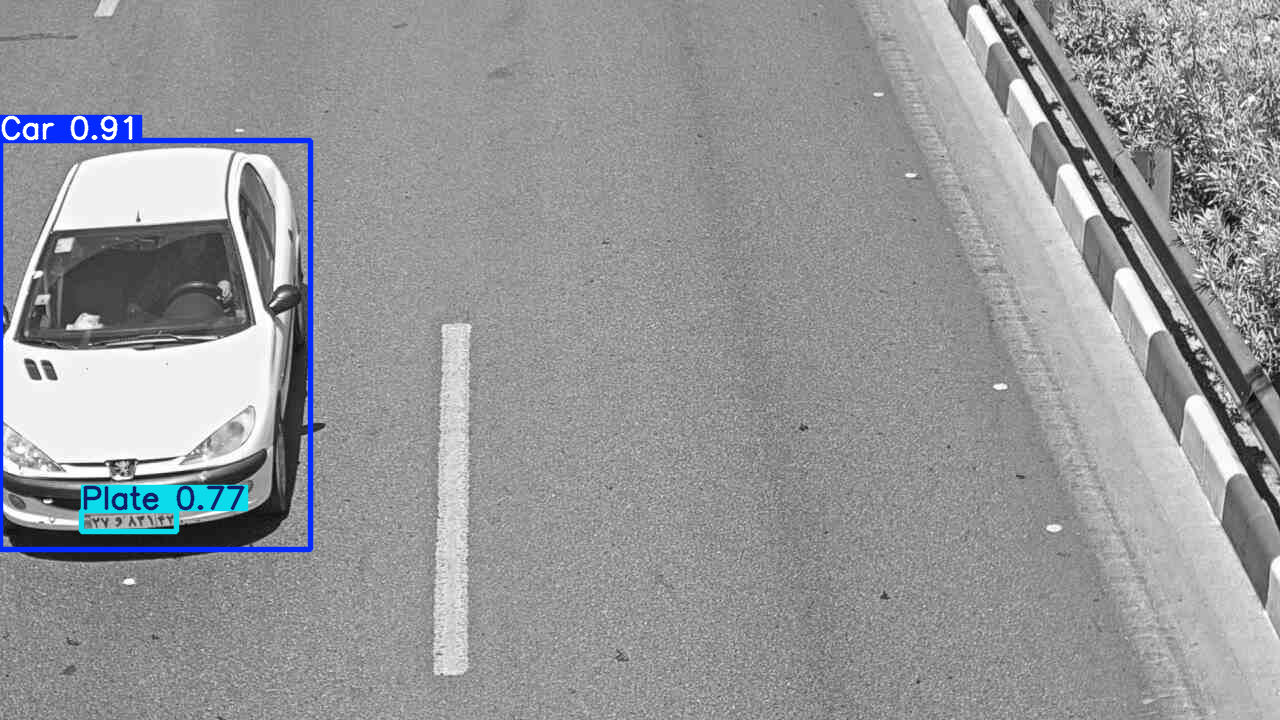

Processed image: /content/drive/MyDrive/dataset_Car_Plate/images/test/img%20(4003).jpg

0: 384x640 2 Cars, 2 Plates, 26.3ms
Speed: 2.6ms preprocess, 26.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


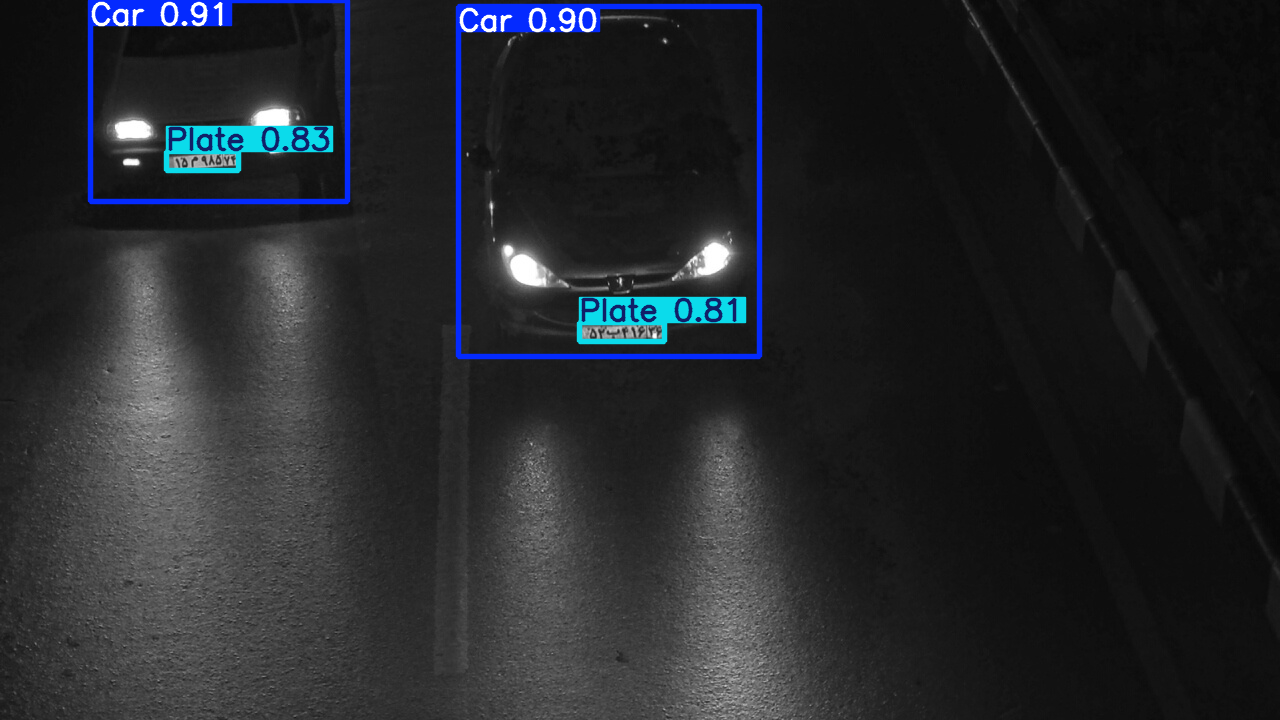

Processed image: /content/drive/MyDrive/dataset_Car_Plate/images/test/m%20-001555223-08-52416-BEH-36-077-066-002-100-000-3Ywx-1.jpg

0: 384x640 1 Car, 1 Plate, 25.2ms
Speed: 2.6ms preprocess, 25.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


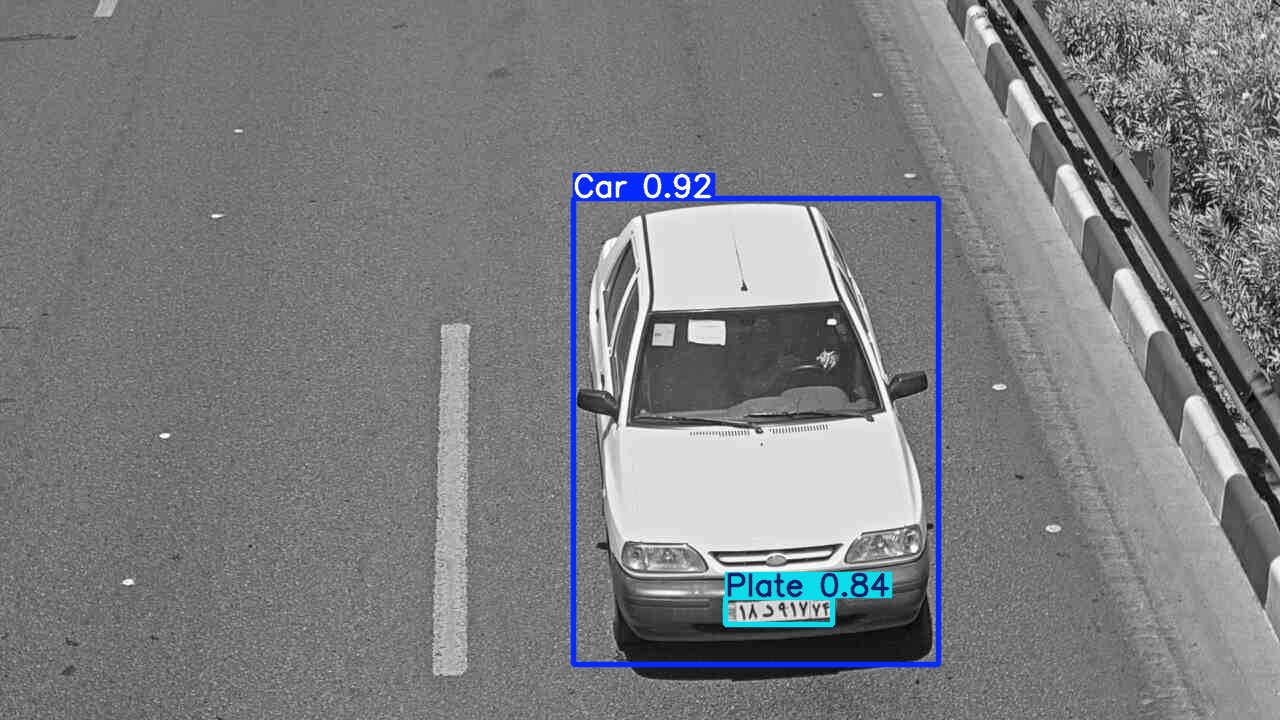

Processed image: /content/drive/MyDrive/dataset_Car_Plate/images/test/img%20(4709).jpg

0: 384x640 2 Cars, 3 Plates, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


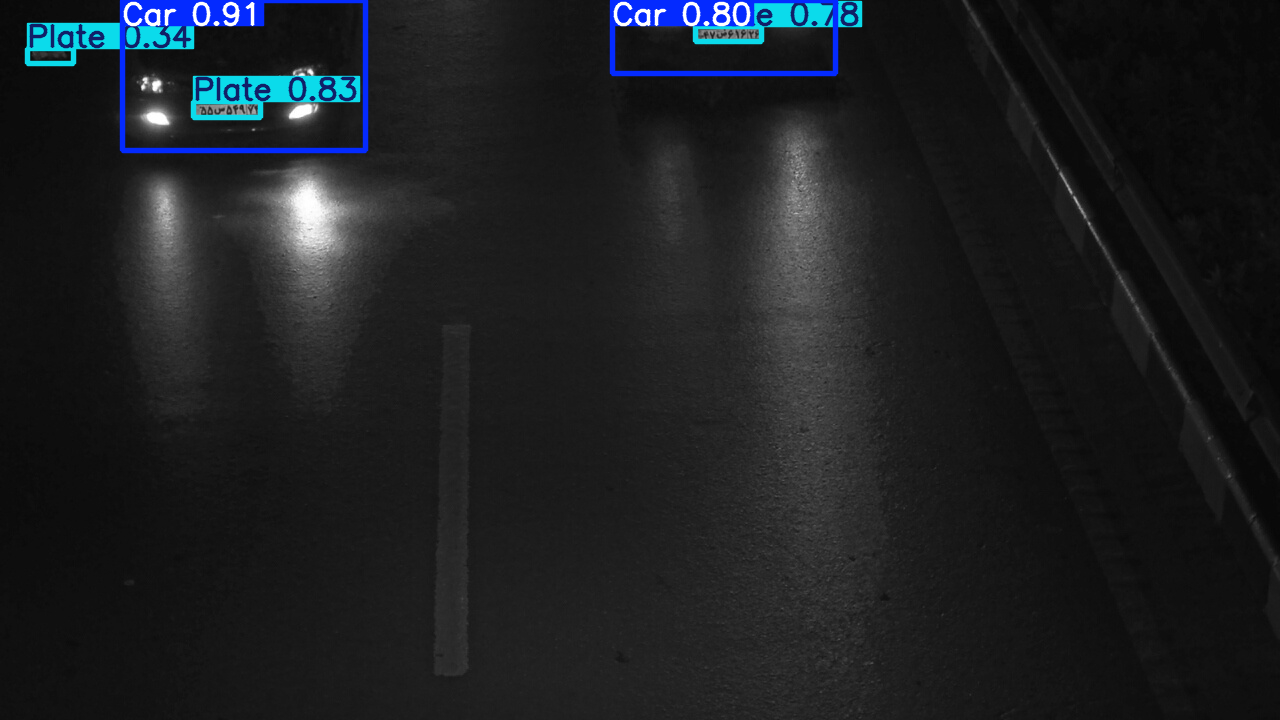

Processed image: /content/drive/MyDrive/dataset_Car_Plate/images/test/m%20-001613866-08-47616-SAAD-26-094-071-003-100-000-3Ywx-1.jpg

0: 384x640 1 Car, 1 Plate, 25.2ms
Speed: 2.5ms preprocess, 25.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


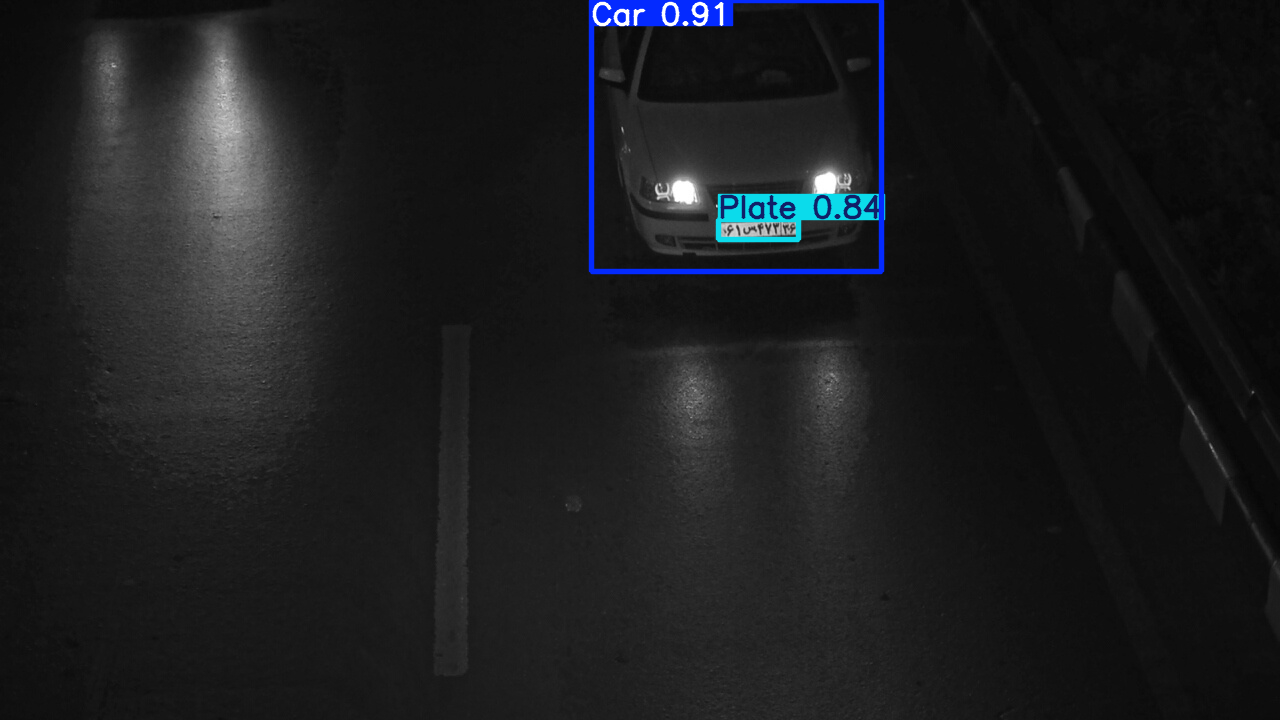

Processed image: /content/drive/MyDrive/dataset_Car_Plate/images/test/m%20-000032185-08-61473-SAAD-36-083-077-003-100-000-3Ywx-1.jpg


In [17]:
import random
from google.colab.patches import cv2_imshow
import cv2
import glob

# Get the list of image paths
result_images = glob.glob('/content/drive/MyDrive/dataset_Car_Plate/images/test/*.jpg')  # Update path if needed

# Randomly sample 5 images from the list
random_images = random.sample(result_images, 5)

# Loop through the randomly selected images
for img_path in random_images:
    # Load the image
    image = cv2.imread(img_path)

    # Perform object detection
    predictions = model(image)  # Run predictions on the image

    # Display the image with bounding boxes
    for result in predictions:  # Assuming predictions contain multiple results (for each class or detection)
        result.show()  # This will show the image with bounding boxes over detected objects

    # Optionally, you can display the image using cv2_imshow for better visualization in Colab
    # cv2_imshow(image)  # Uncomment to display the image directly

    # Print the image path or other details
    print(f"Processed image: {img_path}")

In [18]:
from google.colab.patches import cv2_imshow

# Perform object detection on multiple images
for i in range(1, 7):  # Loop through image numbers 1 to 6
    image_path = f'/content/ ({i}).jpg'  # Construct the image path dynamically with space after /content/
    test_image = cv2.imread(image_path)  # Read the image

    if test_image is None:  # Check if the image exists
        print(f"Image ({i}) not found at {image_path}")
        continue

    # Perform object detection
    predictions = model(test_image)

    # Show the image with bounding boxes
    for result in predictions:
        result.show()


Image (1) not found at /content/ (1).jpg
Image (2) not found at /content/ (2).jpg
Image (3) not found at /content/ (3).jpg
Image (4) not found at /content/ (4).jpg
Image (5) not found at /content/ (5).jpg
Image (6) not found at /content/ (6).jpg


In [ ]:
results = {}

image_dir = './images'
image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Vehicle class IDs (e.g., cars, trucks, buses)
vehicles = [0, 1, 2, 3, 4]

# Initialize frame number
frame_nmr = -1

# Process each image
for image_file in image_files:
    frame_nmr += 1
    frame = cv2.imread(image_file)

    if frame is None:
        continue  # Skip the iteration if the image couldn't be read

    results[frame_nmr] = {}

    # detect vehicles
    detections = coco_model(frame)[0]
    detections_ = []
    for detection in detections.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = detection
        if int(class_id) in vehicles:  # Filter detections to only include vehicles
            detections_.append([x1, y1, x2, y2, score])
            # Iterate over detections and draw bounding boxes on the frame
    for detection in detections_:
        x1, y1, x2, y2, score = detection
        # Draw bounding box on the frame
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Optionally, add a label with the score
        cv2.putText(frame, f"Score: {score:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with drawn bounding boxes
    cv2.imshow('Detected Vehicles', frame)
    cv2.waitKey(0)  # Adjust or remove this for continuous processing